# Stimuli

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import scipy
import anndata as ad
import hdf5plugin
from sklearn.decomposition import TruncatedSVD
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams
import os 
#external modules
#pretty plotting
import seaborn as sb
import sys 
import warnings
import config as general_paths
warnings.filterwarnings("ignore")
sb.set_context(context='poster')

import copy

sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80)

scanpy==1.9.8 anndata==0.9.2 umap==0.5.5 numpy==1.24.4 scipy==1.10.1 pandas==1.5.3 scikit-learn==1.1.3 statsmodels==0.14.1 igraph==0.10.8 louvain==0.8.1 pynndescent==0.5.11


In [2]:
figure_path = general_paths.figures_path
data_path = general_paths.data_path
output_path = general_paths.output_path
local_path = general_paths.local_path
input_path = output_path

In [3]:
# read the files
adata_path = os.path.join(input_path,'campari_umap_from_kallisto.h5ad')
adata = ad.read_h5ad(adata_path)

In [4]:
NO_PCA = 20

## Our Stimuli
* 0: control
* 1: pinch
* 2: new_stroke (after december)
* 3: ballon
* 4: AG (ano-genital brush)
* 5: AD (anal distension)
* 6: heating
* 7: mock
* 8: old_stoke (first experiments with stroke)
* 9: anal pinch
* 10: mock with poop
* 11: vaginal distansion
* 12: tomatoe
* 13: poop
* 14: Bladder
* 15: Colon-rectum distension (CRD)
* 16: AD + CFA (anal distension + inflamation)
* 17: AGB + CFA (ano-genital brush + inflamation)
* 18: Heating + CFA (heating + inflamation)
* 19: Tail Brush
* 20: TRPM8 td Tomato
* 21: AD + Pulse
* 22: AGB-CFA 1 W
* 23: AD-CFA 1W
* 24: HP
* 25: Penis
* 26: Clitoris Vibration
* 27: Max Cells
* 28: Tracing Ano Genital Skin injection
* 29: Crazy Mock
* 30: Tracing Anal injection
* 31: Tracing Vagina

In [5]:
adata

AnnData object with n_obs × n_vars = 2069 × 16000
    obs: 'sample', 'stimulus', 'red', 'green', 'well_id', 'plate_number', 'batch', 'stimulus_name', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_counts', 'n_genes', 'to_exclude', 'plate_str', 'louvain_r0.5', 'louvain_r1', 'louvain_r1.5', 'louvain_r2', 'louvain_r2.5'
    var: 'gene_id', 'gene_name', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'hvg', 'log1p', 'louvain', 'louvain_r0.5_colors', 'louvain_r1.5_colors', 'louvain_r1_colors', 'louvain_r2.5_colors', 'louvain_r2_colors', 'neighbors', 'pca', 'plate_str_colors', 'sample_colors', 'stimulus_name_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [6]:
labels=['Control','Pinch','New_stroke','Ballon','AG','AD','Heating','Mock','Old_stroke','Anal_pinch','Mock_w_poop','Vaginal_distension','Tomato','Poop', 
        'Bladder','CRD','AD+CFA','AGB+CFA','Heating+CFA','Tail Brush','TRPM8 td tomato',
        'AD + Pulse', 'AGB+CFA 1 W','AD+CFA 1W','HP','Penis','Clitoris Vibration','Max Cells',
        'Tracing Ano Genital Skin injection','Crazy Mock','Tracing Anal injection', 'Tracing Vagina']

In [7]:
### transform adata sparse matrix to scipy
x = adata.X
### create arrays with information about stimuli, fluorecence, and louvain transformations
stim = np.zeros((x.shape[0],))
plate_numbers = np.zeros((x.shape[0],))
red = np.zeros((x.shape[0],))
green = np.zeros((x.shape[0],))
for i in range(x.shape[0]):
    stim[i] = adata.obs['stimulus'][i]
    plate_numbers[i] = adata.obs['plate_number'][i]
    red[i] = adata.obs['red'][i]
    green[i] = adata.obs['green'][i]

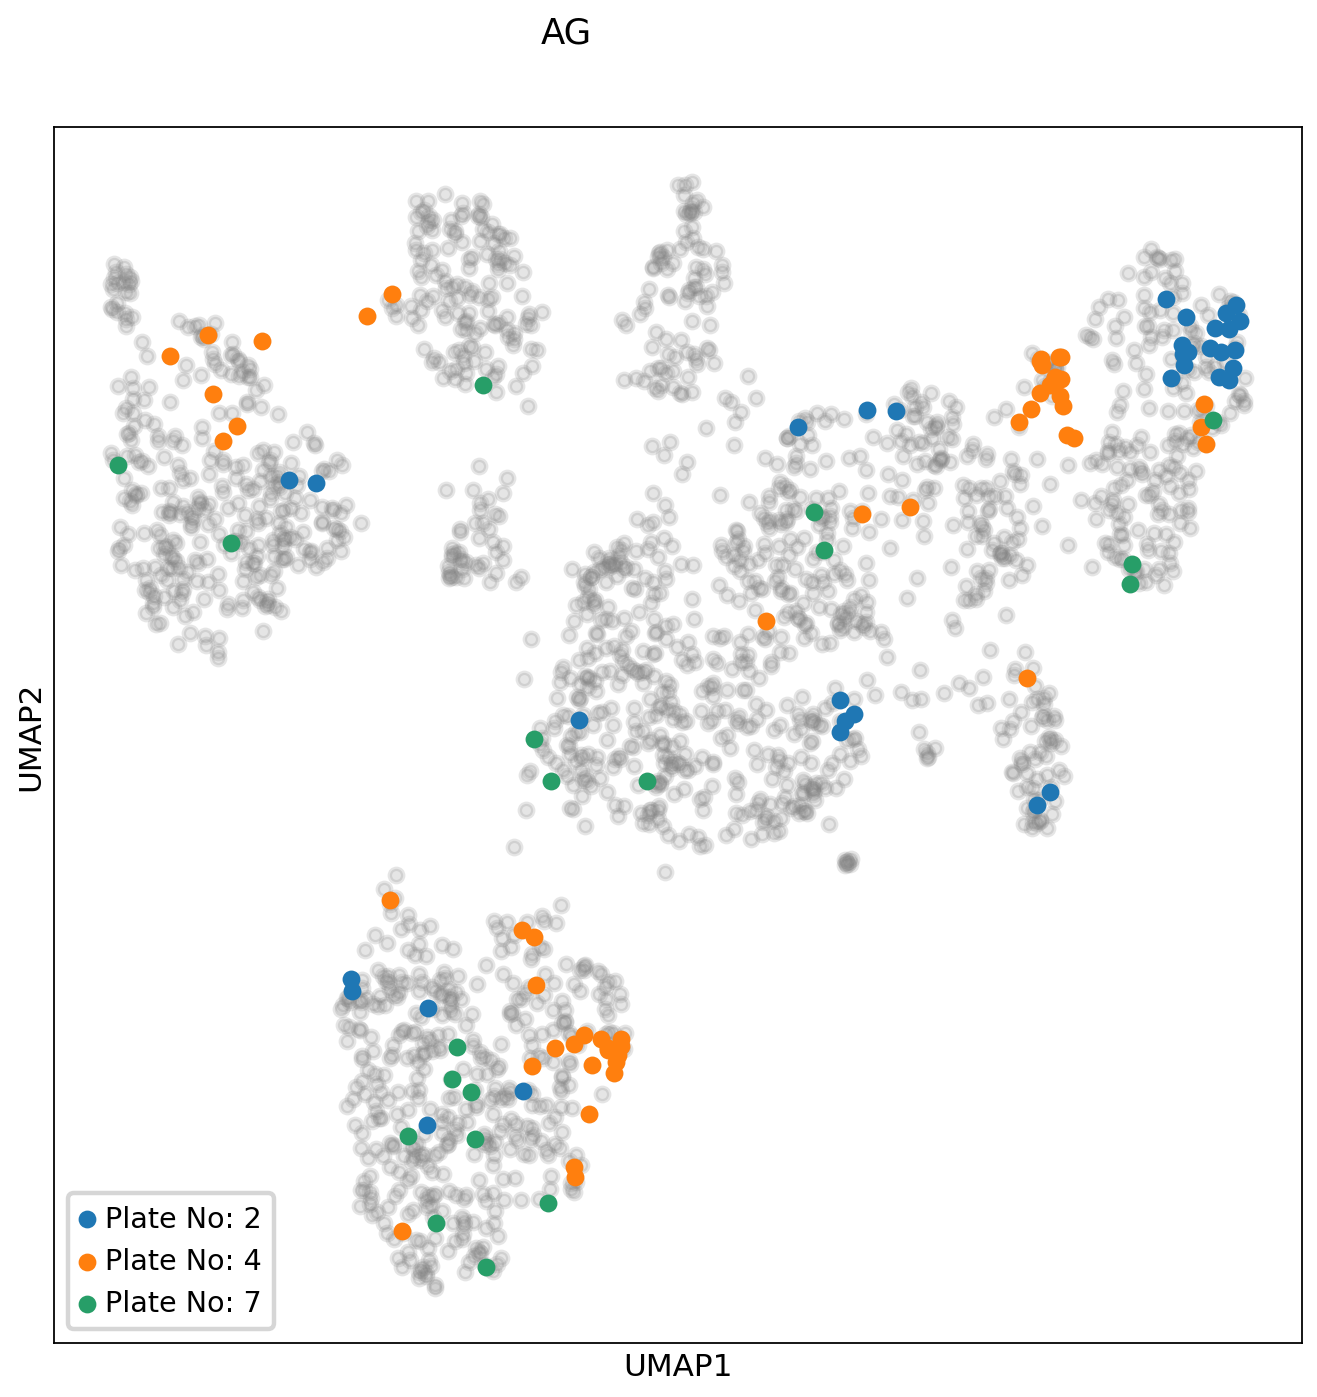

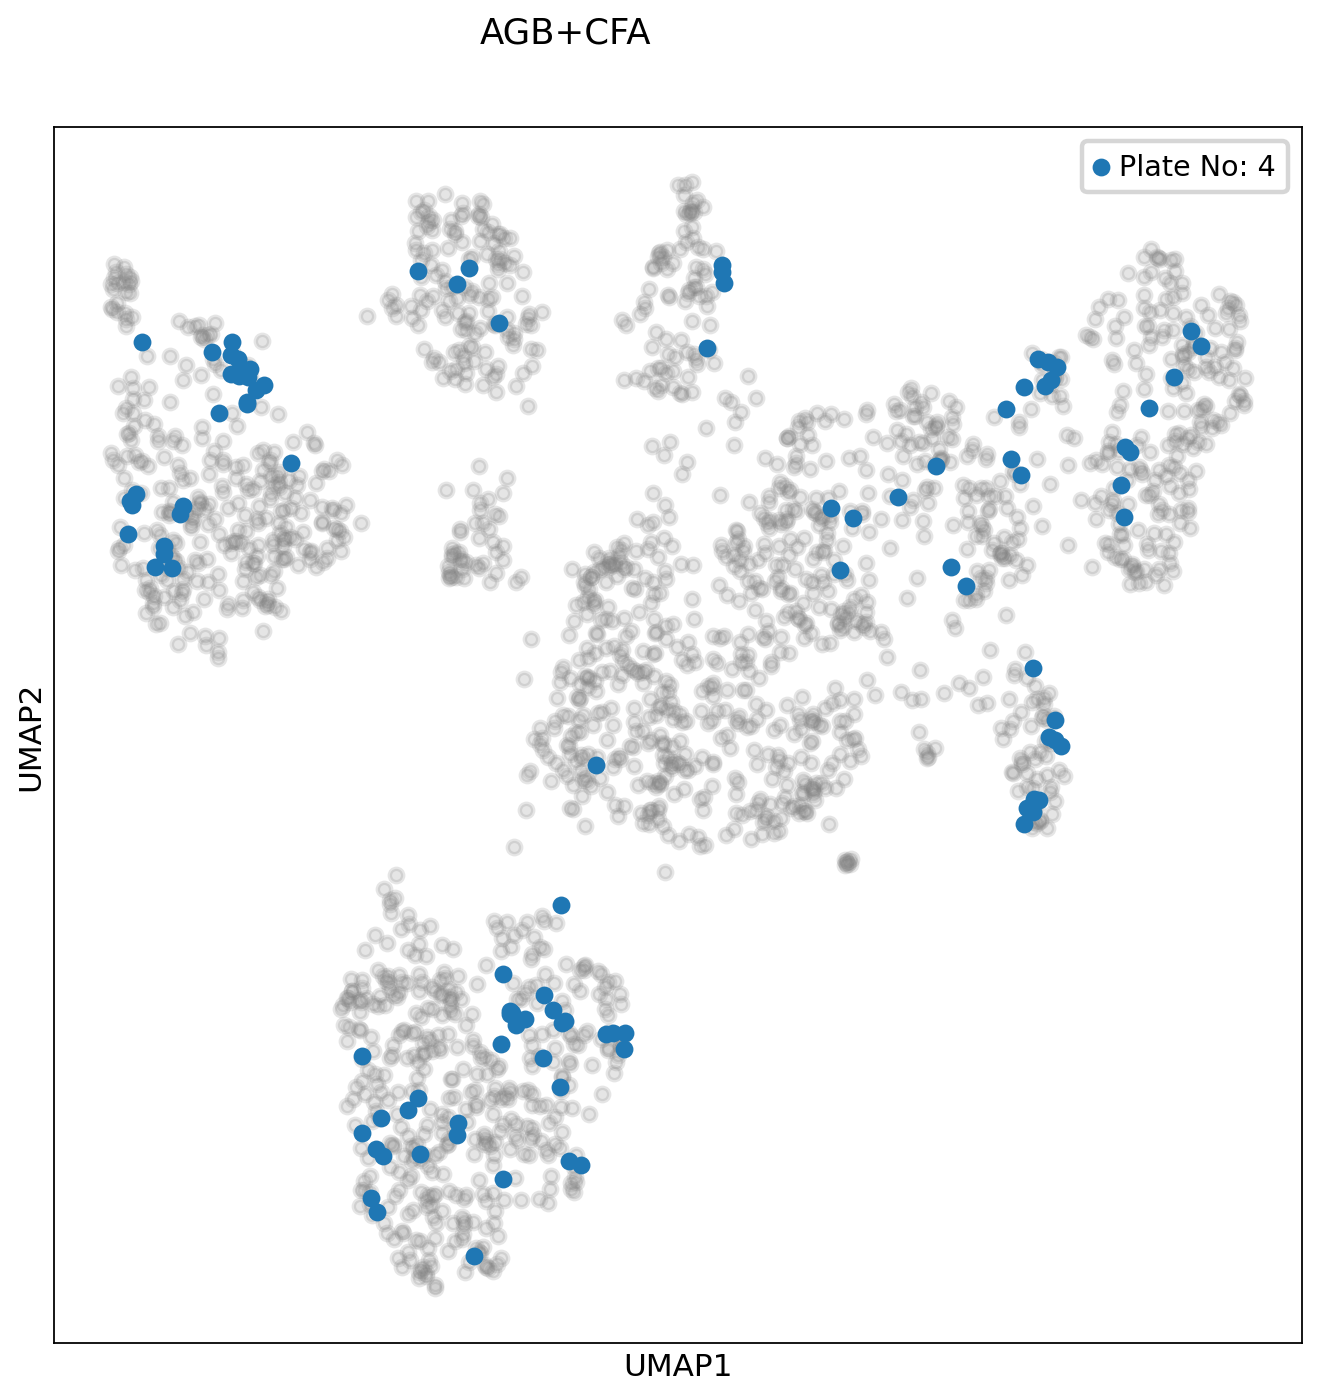

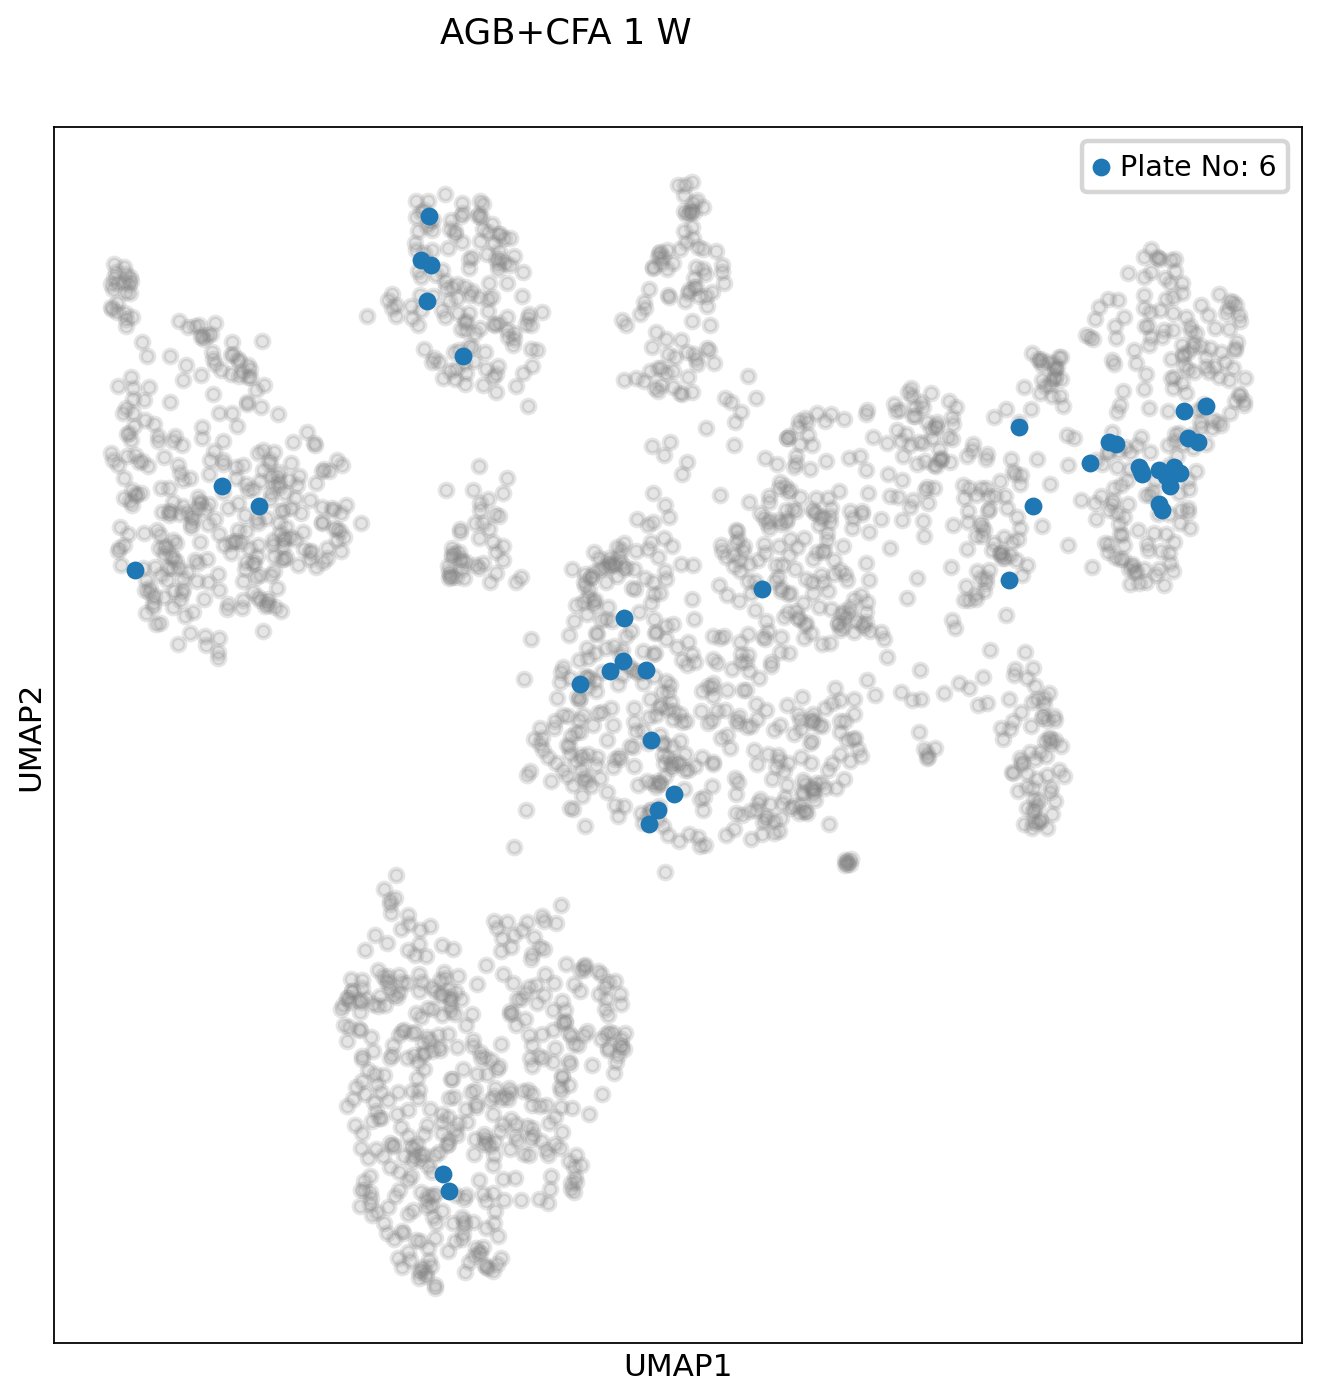

In [9]:
# Interesting stimuli
stimuli_agb = [4,17,22]
stimuli_ad = [5,16,23]
stimuli2show = [4,17,22]
# show each stimulus separately, distinguish between each sample(plate)
unique_wells = list(set(plate_numbers))
for i in range(0,len(labels)):
    if i in stimuli2show: # show only selected stimuli
        figure, axes = plt.subplots()
        axes.scatter(adata.obsm['X_umap'][:,0],adata.obsm['X_umap'][:,1],c='gray',alpha=0.2)
        # unique_wells = list(set(plate_numbers))
        stim_index = np.where(stim == i)[0]
        for well in unique_wells: # show different wells differently
            well_index = np.where(plate_numbers == well)[0]
            # select only common indexes
            index = list(set(stim_index).intersection(well_index))
            if len(index) > 0:
                # print(f"{labels[i]}: well: {well}")
                axes.scatter(adata.obsm['X_umap'][index,0],adata.obsm['X_umap'][index,1],label="Plate No: "+str(int(well)))
        axes.grid(False)
        axes.legend()
        figure.set_size_inches([10,10])
        figure.suptitle(labels[i], fontsize=16)
        # Hide X and Y axes tick marks
        axes.set_xticks([])
        axes.set_yticks([])
        axes.set_xlabel('UMAP1')
        axes.set_ylabel('UMAP2')
        # figure.savefig(os.path.join(figure_path, 'stimulus_'+labels[i]+'.png'))

Text(0, 0.5, 'UMAP2')

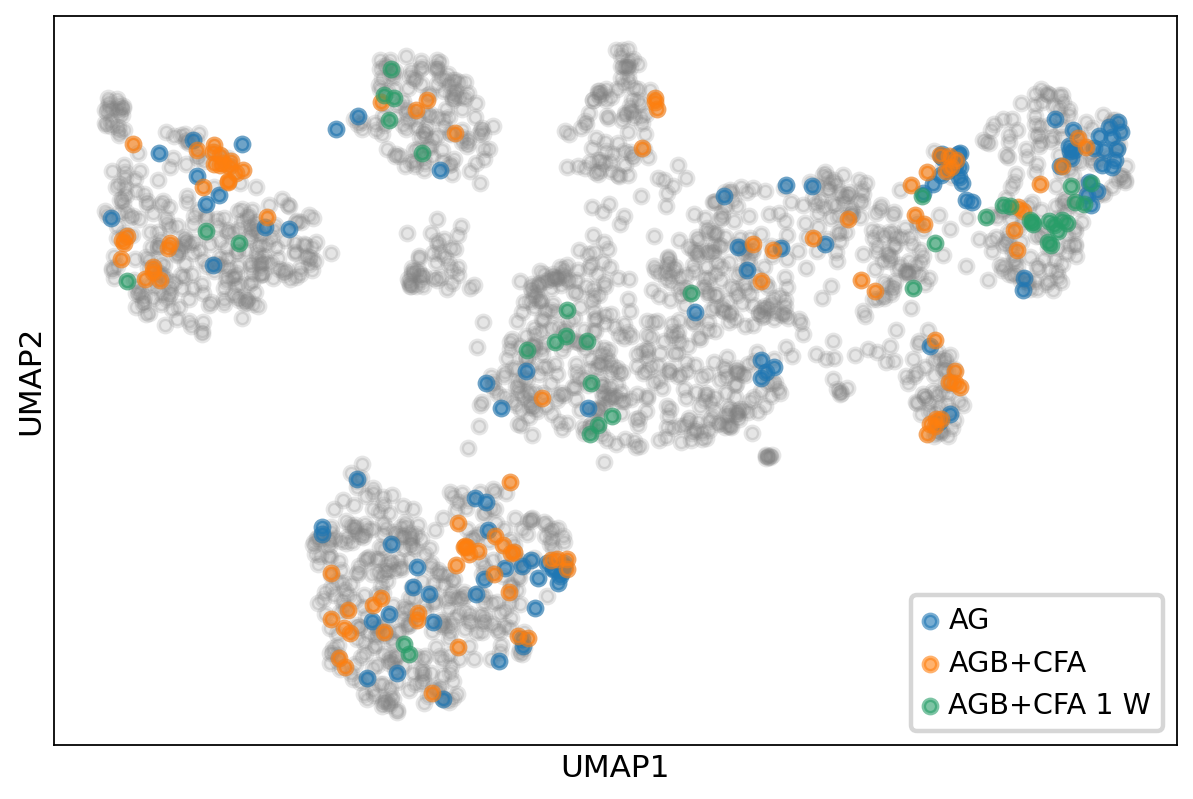

In [10]:
# show each stimulus on a single plot
figure, axes = plt.subplots()
axes.scatter(adata.obsm['X_umap'][:,0],adata.obsm['X_umap'][:,1],c='gray',alpha=0.2)
for i in range(0,len(labels)):
    if i in stimuli2show:
        stim_index = np.where(stim == i)[0]
        
        axes.scatter(adata.obsm['X_umap'][stim_index,0],adata.obsm['X_umap'][stim_index,1],label = labels[i],alpha=0.6)
axes.grid(False)
axes.legend()
figure.set_size_inches([9,6])
# figure.suptitle("AD", fontsize=16)
# Hide X and Y axes tick marks
axes.set_xticks([])
axes.set_yticks([])
axes.set_xlabel('UMAP1')
axes.set_ylabel('UMAP2')